# Semantic Search Engine using Deep Contextualized Language Representation:
## Security & Smart Home

In [1]:
# Import packages

from gensim.test.utils import datapath
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import spatial
import pickle
import pandas as pd

# Load documents with JSD <= 0.4 from the reference document for each topic
topic_19_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_19_df.csv"))
topic_18_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_18_df.csv"))
topic_9_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_9_df.csv"))
topic_7_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_7_df.csv"))
topic_4_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_4_df.csv"))
topic_16_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_16_df.csv"))
topic_15_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_15_df.csv"))
topic_11_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_11_df.csv"))
topic_5_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_5_df.csv"))

#change column name
for df in (topic_19_df, topic_18_df, topic_9_df, topic_7_df, topic_4_df, topic_16_df,
           topic_15_df, topic_11_df, topic_5_df):
    new_columns = df.columns.values
    new_columns[0] = 'raw_index'
    df.columns = new_columns

print("Num. of documents with JSD score of <= 0.4 from reference document:")
print("In topic 19: ", topic_19_df.shape[0])
print("In topic 18: ", topic_18_df.shape[0])
print("In topic 9: ", topic_9_df.shape[0])
print("In topic 7: ", topic_7_df.shape[0])
print("In topic 4: ", topic_4_df.shape[0])
print("In topic 16: ", topic_16_df.shape[0])
print("In topic 15: ", topic_15_df.shape[0])
print("In topic 11: ", topic_11_df.shape[0])
print("In topic 5: ", topic_5_df.shape[0])

Num. of documents with JSD score of <= 0.4 from reference document:
In topic 19:  776
In topic 18:  868
In topic 9:  404
In topic 7:  336
In topic 4:  148
In topic 16:  155
In topic 15:  91
In topic 11:  244
In topic 5:  83


## How much does security feature in discourse within each topics?
### Load ELMo vectors for documents with a Jensen-Shannon Distance <= 0.4 from the reference document for each topics

In [2]:
def ELMo_vectors(topic_num):
    ELMo_file = datapath("ELMo_vectors\\ELMo_trained_{}.pkl".format(topic_num))

    with open(ELMo_file, "rb") as f:
        ELMo_topic = pickle.load(f)
    
    return ELMo_topic

ELMo_19 = ELMo_vectors(19)
ELMo_18 = ELMo_vectors(18)
ELMo_9 = ELMo_vectors(9)
ELMo_7 = ELMo_vectors(7)
ELMo_4 = ELMo_vectors(4)
ELMo_16 = ELMo_vectors(16)
ELMo_15 = ELMo_vectors(15)
ELMo_11 = ELMo_vectors(11)
ELMo_5 = ELMo_vectors(5)

### Semantic Search Engine

**Security query**:
1. Chen, D., & Zhao, H. (2012). Data security and privacy protection issues in cloud computing. Proceedings - 2012 International Conference on Computer Science and Electronics Engineering, ICCSEE 2012, 1(973), 647–651. https://doi.org/10.1109/ICCSEE.2012.193

In [3]:
# Load ELMo vecotr for the query
security_rich_text_query = datapath("ELMo_vectors\\security_rich_text_query.pkl")
with open(security_rich_text_query, "rb") as f:
    security_rich_text_query = pickle.load(f)

### Cosine similarity distribution of security within the topics

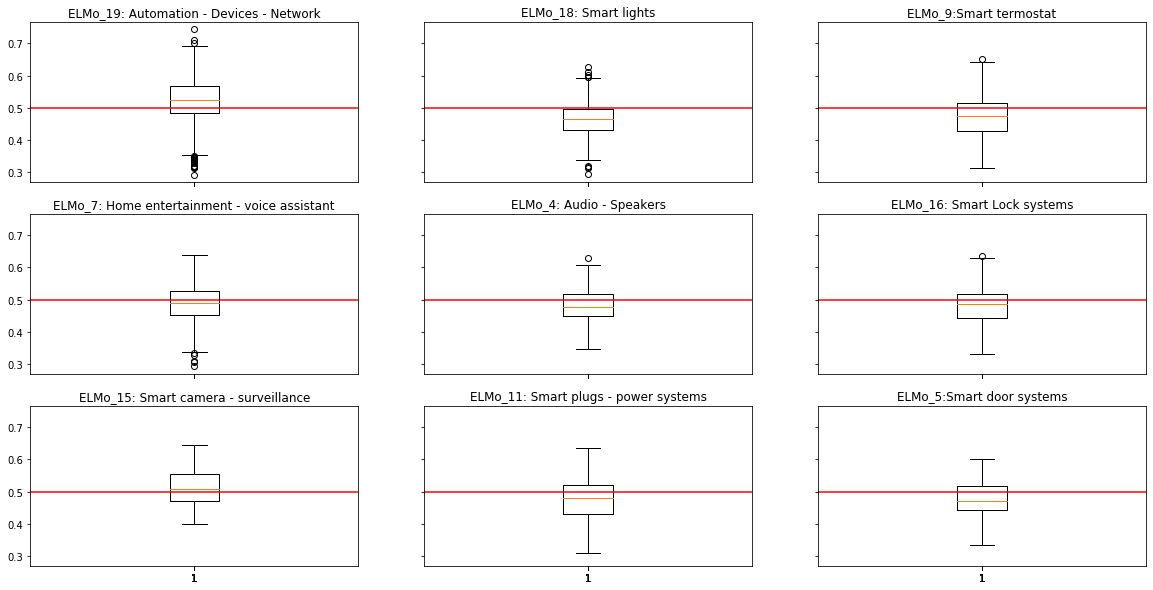

In [9]:
import matplotlib.pyplot as plt

# Run cosine similarity to compare the security search query against the ELMo vectors from the documents within each topic.
final = []
for model in [ELMo_19, ELMo_18, ELMo_9, ELMo_7, ELMo_4, ELMo_16, ELMo_15, ELMo_11, ELMo_5]:
    result = []
    for doc_vect in model:
        result.append(1 - spatial.distance.cosine(security_rich_text_query, doc_vect))
    final.append(result)
    
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(20, 10))

name = ['ELMo_19: Automation - Devices - Network', 'ELMo_18: Smart lights', 'ELMo_9:Smart termostat', 
        'ELMo_7: Home entertainment - voice assistant', 'ELMo_4: Audio - Speakers', 'ELMo_16: Smart Lock systems', 
        'ELMo_15: Smart camera - surveillance', 'ELMo_11: Smart plugs - power systems', 'ELMo_5:Smart door systems']

for i in range(3):
    for j in range(3):
        axs[i, j].boxplot(final[i*3+j])
        axs[i, j].axhline(y=0.5, color='r', linestyle='-')
        axs[i, j].set_title('{}'.format(name[i*3+j]))

**COMMENT**:  <br/>
Security feature more in topics:
* Automation -Devices - Network
* Smart camera - surveillance

# Cluster the contextual vectors for security based on our training data
## TOPIC 19: Automation - Devices - Network

In [10]:
# Calculate cosine similarity for documents of topic 19 against security's rich query text
idx_19_cosine = pd.DataFrame({'raw_index': list(topic_19_df.raw_index),
                             'cosine_similarity': final[0]})

# Subset only for documents with a cosine similarity score above 60
idx_19_cosine = idx_19_cosine.where(idx_19_cosine.cosine_similarity > 0.60).dropna()

ELMo_19_subset = [ELMo_19[int(idx)] for idx in idx_19_cosine.index]
topic_19_subset = topic_19_df[['text', 'raw_index']].loc[topic_19_df['raw_index'].isin(idx_19_cosine.raw_index)]


In [11]:
topic_19_subset = 'INDEX: '+ topic_19_subset['raw_index'].astype(str) +' <br /> '+ topic_19_subset['text']

In [12]:
idx_19_cosine.sort_values(by='cosine_similarity', ascending=False)

,raw_index,cosine_similarity
284,4778.0,0.743183
147,2386.0,0.709861
446,5130.0,0.700359
562,3420.0,0.693023
766,4060.0,0.689641
...,...,...
65,6309.0,0.601803
693,1794.0,0.601070
336,4912.0,0.600659
311,748.0,0.600161


#### PCA and TSNE visualization

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=int(topic_19_subset.shape[0] / 2)) #reduce down dim
y = pca.fit_transform(ELMo_19_subset)
y = TSNE(n_components=2).fit_transform(y) # further reduce to 2 dim using t-SNE


In [14]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import chart_studio
chart_studio.tools.set_credentials_file(username='researcher_au', api_key='czWjQw6GpbgSb0ViJMCY')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import re

data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        # add a new line every 10 words and a new line at every comments
        text=['<br />'.join([' '.join(re.sub(r"[><]", "<br />", line).split()[i:i+10]) 
              for i in range(0, len(line.split()), 10)]) 
              for line in topic_19_subset],
    marker=dict(
        size=10,
        color = [i for i in idx_19_cosine['cosine_similarity']], #set color equal to the cosine similarity
        opacity= 0.8,
        colorscale='Viridis',
        showscale=True,
        cmax=0.70,
        cmin=0.60,
        colorbar = dict(title = "Cosine Similarity")
    )
    )
]
layout = go.Layout()
layout = dict(
              title="PCA and t-SNE dimensionality reduction: TOPIC 19 & SECURITY",
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Topic_19_security')


#### Text extraction

In [15]:
list(topic_19_df['text'].where(topic_19_df.raw_index == 4778).dropna())

['Thoughts on Security + Automation Ecosystem <SUB> I am looking for opinions, especially from those with experience. Am I overthinking this? \n\nI have a Qolsys IQ panel for my home security system. This panel is a Z-wave controller and includes an Alarm.com account for interactive services. I am beginning to purchase smart home devices and I feel like I am at a crossroads. I can continue to use my IQ panel as controller or I can keep the IQ panel "pure" security and use a more robust home automation solution. \n\nI think the pro\'s of my current system are that everything is in one system/app, and home events can be linked to security events, e.g. disarm on unlock or stop furnace fan if smoke detector alarms. \n\nThe cons of my current system are a (relatively) limited number of device integrations, slow updates to incorporate new systems, a basic interface and prescribed rules preclude IFTT-style customization.  <SUB> I have Abode as well. It is a rock solid security system but it i

In [16]:
list(topic_19_df['text'].where(topic_19_df.raw_index == 5130).dropna())

["Z-wave switch that supports encryption <SUB> So reading up on z-wave security I was shocked to see that encryption is not a default thing on z-wave devices.  From my search, *MOST* devices don't support encryption, which to me is blasphemy.\n\nI was planning on picking up some GE Z-wave toggle switches, but am now reconsidering due to the lack of encryption.\n\nCan anyone recommend a z-wave toggle switch that supports encryption?  Thanks! <SUB> - As many have pointed out Z-wave Plus should have this built in and many devices are already on the market.\r\n- Z-wave is very low power and doesn't have much range, you would need to be rather close to trigger something unless you have extended your Z-wave mesh out to a bunch of external devices\r\n- Unsecured devices generally don't do much that warrants extra security, your garage door opener is probably more common and easier to exploit.\r\n- There are wired professional automation systems, wired is nearly always more secure than wireles

## TOPIC 15: Smart camera - surveillance

In [17]:
# Calculate cosine similarity for documents of topic 4 against security's rich query text
idx_15_cosine = pd.DataFrame({'raw_index': list(topic_15_df.raw_index),
                             'cosine_similarity': final[6]})

# Subset only for documents with a cosine similarity score above 60
idx_15_cosine = idx_15_cosine.where(idx_15_cosine.cosine_similarity > 0.60).dropna()

ELMo_15_subset = [ELMo_15[int(idx)] for idx in idx_15_cosine.index]
topic_15_subset = topic_15_df[['text', 'raw_index']].loc[topic_15_df['raw_index'].isin(idx_15_cosine.raw_index)]

In [18]:
topic_15_subset = 'INDEX: '+ topic_15_subset['raw_index'].astype(str) +' <br /> '+ topic_15_subset['text']
idx_15_cosine.sort_values(by='cosine_similarity', ascending=False)

,raw_index,cosine_similarity
69,3006.0,0.644305
61,683.0,0.632087
63,5804.0,0.618869
66,1461.0,0.607122
45,6789.0,0.606018
56,926.0,0.602983


#### PCA and TSNE visualization

In [20]:
pca = PCA(n_components=int(topic_15_subset.shape[0] / 2)) #reduce down dim
y = pca.fit_transform(ELMo_15_subset)
y = TSNE(n_components=2).fit_transform(y) # further reduce to 2 dim using t-SNE

In [21]:
data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        # add a new line every 10 words and a new line at every comments
        text=['<br />'.join([' '.join(re.sub(r"[><]", "<br />", line).split()[i:i+10]) 
              for i in range(0, len(line.split()), 10)]) 
              for line in topic_15_subset],
    marker=dict(
        size=10,
        color = [i for i in idx_15_cosine['cosine_similarity']], #set color equal to the cosine similarity
        opacity= 0.8,
        colorscale='Viridis',
        showscale=True,
        cmax=0.70,
        cmin=0.60,
        colorbar = dict(title = "Cosine Similarity")
    )
    )
]
layout = go.Layout()
layout = dict(
              title="PCA and t-SNE dimensionality reduction: TOPIC 15 & SECURITY",
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Topic_15_security')

In [286]:
list(topic_15_df['text'].where(topic_15_df.raw_index == 3006).dropna())

["Standalone cameras <SUB> **EDIT**: I am an idiot. Ispy (open source) does this for you.\n\nHi all,\n\nCurrently I have Wink hub and a bunch of things running off that, but my cameras, which I purchased before this all started, are Foscam. I have recently become interested in streaming and recording the video from the cameras, not just motion detection screenshots, and have been informed that foscam cannot do this.\n\nSo I'm wondering, what wireless networked cameras do y'all have, and can they record a live stream and write to an FTP server or hard drive setup? They can be standalone or hub connectable.\n\nThanks <SUB> [deleted]"]